In [43]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import csv

# Data Reading

In [2]:
digit_df = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q1/train.csv",header=None)

training_shape = digit_df.shape
col=[]
for i in range(0,training_shape[1]):
    col.append(i)

digit_df.columns = col
digit_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Dataframe to Numpy Array

In [4]:
digit_arr = digit_df.to_numpy()
digit_arr

array([[1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [6, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

# # Spliting Data -> Training(97%) and Validation(3%)

In [5]:
msk = np.random.rand(len(digit_df)) < 0.03

training_df = digit_df[~msk]
validation_df= digit_df[msk]

training_arr= training_df.to_numpy()
validation_arr = validation_df.to_numpy()

training_shape = training_df.shape
validation_shape= validation_df.shape

print(training_df.shape)
print(validation_df.shape)

(19423, 785)
(577, 785)


# Validation check

In [27]:
#main Function

In [7]:
validationresult0=[]
validationresult1=[]
validationresult2=[]
validationresult3=[]
validationresult4=[]
validationresult5=[]
for i in range(0,validation_shape[0]):
    result=[]
    print(i)
    for j in range(0,training_shape[0]):
        x = check(validation_arr[i,1:,],training_arr[j,1:,])
        label = training_arr[j,0]
        result.append([label,x])
    result.sort(key = sortbysecond)
    getcount(result)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [38]:
#hepler function

In [6]:
k0=5
k1=30
k2=55
k3=75
k4=95
k5=120
def check(test,digit):
    result = np.subtract(test,digit)
    result = np.power(result,2)
    x = np.sum(result)
    return math.sqrt(x)

def sortbysecond(val):
    return val[1]

def getcount(result):
    l=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,k5):
        x=result[i][0]
        l[x] = l[x]+1
        
        if(i==k0-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult0.append(index)
        elif(i==k1-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult1.append(index)
        elif(i==k2-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult2.append(index)
        elif(i==k3-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult3.append(index)
        elif(i==k4-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult4.append(index)
        elif(i==k5-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            validationresult5.append(index)


# Validation Report

In [9]:
accuracy_axis=[]
precision_axis=[]
recall_axis=[]
f1_score_axis=[]
classification ={}
kk=[5,30,55,75,95,120]

def checkresult(testresult):
    result = confusion_matrix(validation_df.iloc[:,0],testresult)
    print(result)
    print("Accuracy Score: ", accuracy_score(validation_df.iloc[:,0],testresult))
    print("Precision Score: ", precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("Recall Score: ", recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("F1 Score: " ,f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    print("-------------------------------------------------------------------------------------")
checkresult(validationresult0)
checkresult(validationresult1)
checkresult(validationresult2)
checkresult(validationresult3)
checkresult(validationresult4)
checkresult(validationresult5)



def storeresult(testresult):
    accuracy_axis.append(accuracy_score(validation_df.iloc[:,0],testresult))
    precision_axis.append(precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    recall_axis.append(recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    f1_score_axis.append(f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))

storeresult(validationresult0)
storeresult(validationresult1)
storeresult(validationresult2)
storeresult(validationresult3)
storeresult(validationresult4)
storeresult(validationresult5)

[[65  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  1  0  0  0  0  1]
 [ 0  2 51  0  0  0  0  0  0  1]
 [ 0  0  1 61  0  0  0  0  1  0]
 [ 0  0  0  0 43  0  0  0  0  1]
 [ 0  0  0  2  0 49  0  0  0  0]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  1  0  0  0  0  0 66  0  1]
 [ 0  1  0  0  0  2  1  0 50  0]
 [ 0  0  0  2  0  0  0  2  0 51]]
Accuracy Score:  0.9636048526863085
Precision Score:  0.9644022025446175
Recall Score:  0.9626695452237248
F1 Score:  0.9633734540051044
-------------------------------------------------------------------------------------
[[65  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  1  0  0  1  0  0]
 [ 0  3 49  0  0  0  1  1  0  0]
 [ 0  0  0 62  0  1  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  1]
 [ 0  0  0  2  0 49  0  0  0  0]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  2  0  0  0  0  0 65  0  1]
 [ 0  3  0  0  0  3  0  0 48  0]
 [ 0  0  0  2  1  0  0  0  0 52]]
Accuracy Score:  0.9584055459272097
Precision Score:  0.9608783527618845
Recall Score:  0.9571970329865067
F1 Score

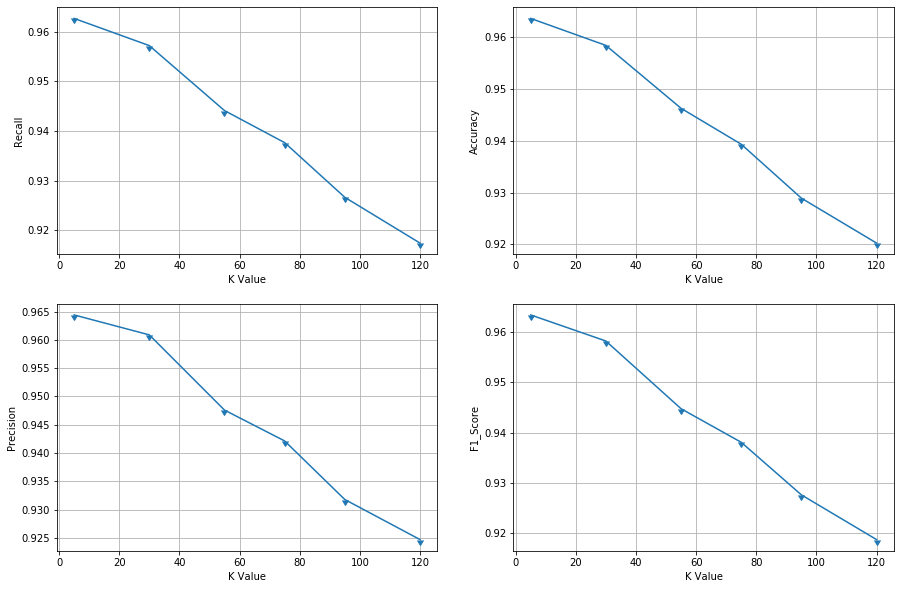

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, recall_axis,marker=11,label="Recall")
plt.grid(True)
# plt.legend(loc="upper right")
plt.xlabel('K Value')
plt.ylabel('Recall')

plt.subplot(2,2,2)
# plt.figure(figsize=(8,5))
plt.plot(kk, accuracy_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
# plt.show()
plt.subplot(2,2,3)
# plt.figure(figsize=(8,5))
plt.plot(kk, precision_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Precision')
# plt.show()
plt.subplot(2,2,4)
# plt.figure(figsize=(5))
plt.plot(kk, f1_score_axis,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('F1_Score')
plt.show()
# recall_axis

# Classification Report for Validation Data

In [32]:
from sklearn.metrics import classification_report
kk=[5,30,55,75,95,120]
classification0 = {}
classification1 = {}
classification2 = {}
classification3 = {}
classification4 = {}
classification5 = {}

classification0 = classification_report(validation_df.iloc[:,0],validationresult0,output_dict=True)
classification1 = classification_report(validation_df.iloc[:,0],validationresult1,output_dict=True)
classification2 = classification_report(validation_df.iloc[:,0],validationresult2,output_dict=True)
classification3 = classification_report(validation_df.iloc[:,0],validationresult3,output_dict=True)
classification4 = classification_report(validation_df.iloc[:,0],validationresult4,output_dict=True)
classification5 = classification_report(validation_df.iloc[:,0],validationresult5,output_dict=True)

In [1]:
from scipy import stats
classification_f1_score0 =[]
classification_f1_score1 =[]
classification_f1_score2 =[]
classification_f1_score3 =[]
classification_f1_score4 =[]
classification_f1_score5 =[]

f1_score_mean=[]
f1_score_median=[]
f1_score_std= []
f1_score_absolute = []

def classification_values(l):
    classification_f1_score =[]
    classification_f1_score.append(l['0']['f1-score'])
    classification_f1_score.append(l['1']['f1-score'])
    classification_f1_score.append(l['2']['f1-score'])
    classification_f1_score.append(l['3']['f1-score'])
    classification_f1_score.append(l['4']['f1-score'])
    classification_f1_score.append(l['5']['f1-score'])
    classification_f1_score.append(l['6']['f1-score'])
    classification_f1_score.append(l['7']['f1-score'])
    classification_f1_score.append(l['8']['f1-score'])
    classification_f1_score.append(l['9']['f1-score'])
    
    arr = np.array(classification_f1_score)
    f1_score_mean.append(np.mean(arr))
    f1_score_median.append(np.median(arr))
    f1_score_std.append(np.std(arr))
    f1_score_absolute.append(stats.median_absolute_deviation(arr))
    
    return classification_f1_score

k5 = classification_values(classification0)
k30 = classification_values(classification1)
k55 = classification_values(classification2)
k75 = classification_values(classification3)
k95 = classification_values(classification4)
k120 = classification_values(classification5)
                      
classification_dict= {'5':k5,'30':k30,'55':k55,'75':k75,'95':k95,'120':k120}
print(classification_dict)

NameError: name 'classification0' is not defined

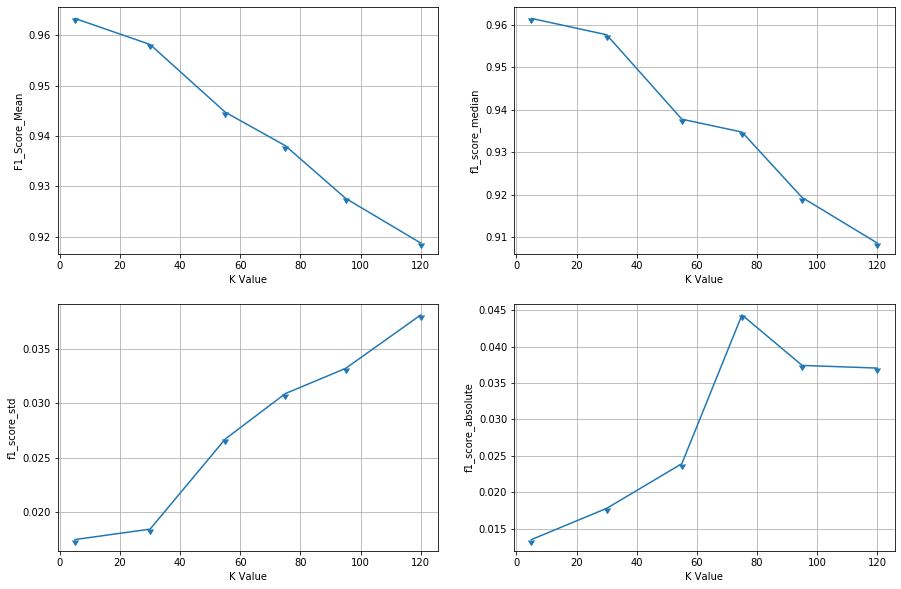

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, f1_score_mean,marker=11,label="Recall")
plt.grid(True)
# plt.legend(loc="upper right")
plt.xlabel('K Value')
plt.ylabel('F1_Score_Mean')

plt.subplot(2,2,2)
# plt.figure(figsize=(8,5))
plt.plot(kk, f1_score_median,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('f1_score_median')
# plt.show()
plt.subplot(2,2,3)
# plt.figure(figsize=(8,5))
plt.plot(kk, f1_score_std,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('f1_score_std')
# plt.show()
plt.subplot(2,2,4)
# plt.figure(figsize=(5))
plt.plot(kk, f1_score_absolute,marker=11)
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('f1_score_absolute')
plt.show()
# recall_axis

# Comparison with Base Line

In [11]:
from random import choice
import random
kk=[5,30,55,75,95,120]
ll0=[]
ll1=[]
ll2=[]
ll3=[]
ll4=[]
ll5=[]
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll0.append(x)
    
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll1.append(x)
    
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll2.append(x)
    
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll3.append(x)
    
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll4.append(x)
    
for i in range(0,validation_shape[0]):
    x=random.randrange(10)
    ll5.append(x)
    
baselineresult_accuracy=[]
baselineresult_recall=[]
baselineresult_precision=[]
baselineresult_f1score=[]

def storeresult(testresult):
    baselineresult_accuracy.append(accuracy_score(validation_df.iloc[:,0],testresult))
    baselineresult_precision.append(precision_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    baselineresult_recall.append(recall_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
    baselineresult_f1score.append(f1_score(validation_df.iloc[:,0],testresult,average="macro",pos_label=1))
storeresult(ll0)
storeresult(ll1)
storeresult(ll2)
storeresult(ll3)
storeresult(ll4)
storeresult(ll5)


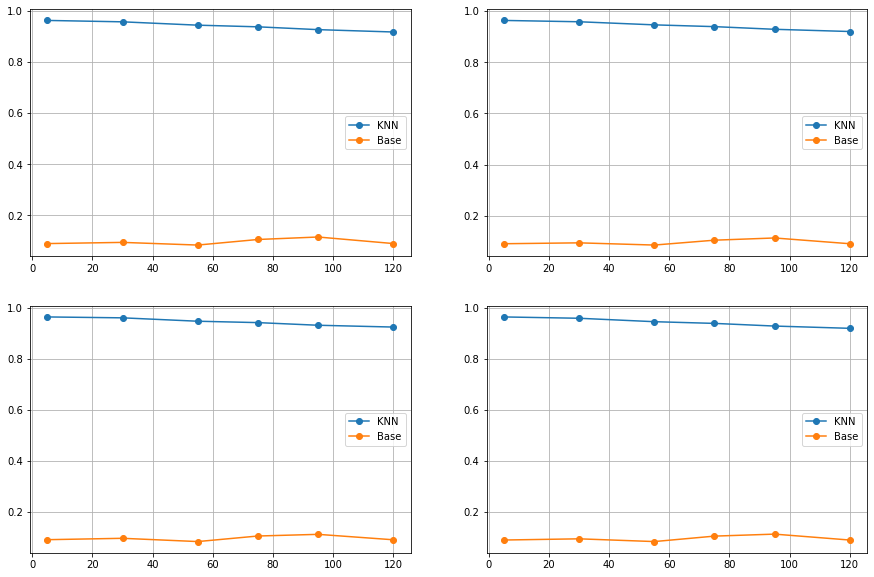

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
# plt.plot(kk, recall_axis,kk,baselineresult_recall,marker='o')
plt.plot(kk,recall_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_recall,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,2)
plt.plot(kk, accuracy_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_accuracy,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,3)
plt.plot(kk, precision_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_precision,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
# plt.show()
plt.subplot(2,2,4)
plt.plot(kk, f1_score_axis,label="KNN",marker='o')
plt.plot(kk,baselineresult_f1score,label="Base",marker='o')
plt.legend(loc="center right")
plt.grid(True)
plt.show()

# Test Data

In [15]:
test_df = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q1/test.csv",header=None)
test_arr = test_df.to_numpy()
test_shape = test_df.shape
test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
k0=5
k1=30
k2=55
k3=75
k4=95
k5=120
def check(test,digit):
    result = np.subtract(test,digit)
    result = np.power(result,2)
    x = np.sum(result)
    return math.sqrt(x)

def sortbysecond(val):
    return val[1]

def getcount(result):
    l=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,k5):
        x=result[i][0]
        l[x] = l[x]+1
        if(i==k0-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult0.append(index)
        elif(i==k1-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult1.append(index)
        elif(i==k2-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult2.append(index)
        elif(i==k3-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult3.append(index)
        elif(i==k4-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult4.append(index)
        elif(i==k5-1):
            curr=0
            index=0
            for i in range(0,len(l)):
                if(l[i] > curr):
                    curr = l[i]
                    index = i
            finalresult5.append(index)

In [17]:
finalresult0=[]
finalresult1=[]
finalresult2=[]
finalresult3=[]
finalresult4=[]
finalresult5=[]
test_shape = test_df.shape
for i in range(0,test_shape[0]):
    result=[]
    print(i)
    for j in range(0,training_shape[0]):
        x = check(test_arr[i],digit_arr[j,1:,])
        label = digit_arr[j,0]
        result.append([label,x])
    result.sort(key = sortbysecond)
    getcount(result)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Test Report

In [55]:
final_accuracy_axis=[]
final_precision_axis=[]
final_recall_axis=[]
final_f1_score_axis=[]
kk=[5,30,55,75,95,120]
finalcheck = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q1/test_labels.csv",header=None)

def checkresult(testresult):
    result = confusion_matrix(finalcheck,testresult)
    print(result)
    print("Accuracy Score: ", accuracy_score(finalcheck,testresult))
    print("Precision Score: ", precision_score(finalcheck,testresult,average="macro",pos_label=1))
    print("Recall Score: ", recall_score(finalcheck,testresult,average="macro",pos_label=1))
    print("F1 Score: " ,f1_score(finalcheck,testresult,average="macro",pos_label=1))
    print("-------------------------------")
checkresult(finalresult0)
checkresult(finalresult1)
checkresult(finalresult2)
checkresult(finalresult3)
checkresult(finalresult4)
checkresult(finalresult5)


def storeresult(testresult):
    final_accuracy_axis.append(accuracy_score(finalcheck,testresult))
    final_precision_axis.append(precision_score(finalcheck,testresult,average="macro",pos_label=1))
    final_recall_axis.append(recall_score(finalcheck,testresult,average="macro",pos_label=1))
    final_f1_score_axis.append(f1_score(finalcheck,testresult,average="macro",pos_label=1))

storeresult(finalresult0)
storeresult(finalresult1)
storeresult(finalresult2)
storeresult(finalresult3)
storeresult(finalresult4)
storeresult(finalresult5)

[[ 93   0   0   0   0   0   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   0 105   1   0   0   0   2   0   0]
 [  0   0   0 107   0   1   0   0   0   0]
 [  0   1   0   0  83   0   1   1   0   5]
 [  0   1   0   1   0  78   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   4   1   0   1   0   0  95   0   3]
 [  1   0   2   2   0   2   0   0  93   0]
 [  1   0   1   0   1   2   0   1   0 106]]
Accuracy Score:  0.961
Precision Score:  0.9616597861765713
Recall Score:  0.9607364659932598
F1 Score:  0.9608153751101742
-------------------------------
[[ 92   0   0   0   0   1   1   0   0   0]
 [  0 100   0   1   0   0   0   0   0   0]
 [  0   2 102   1   0   0   0   2   1   0]
 [  0   1   0 105   0   1   0   0   0   1]
 [  0   3   0   0  80   0   1   1   0   6]
 [  0   2   0   1   0  77   1   0   0   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   6   0   0   1   0   0  94   0   3]
 [  1   1   1   2   1   1   0   1  91   1]
 [  3   0   1   0   0   1 

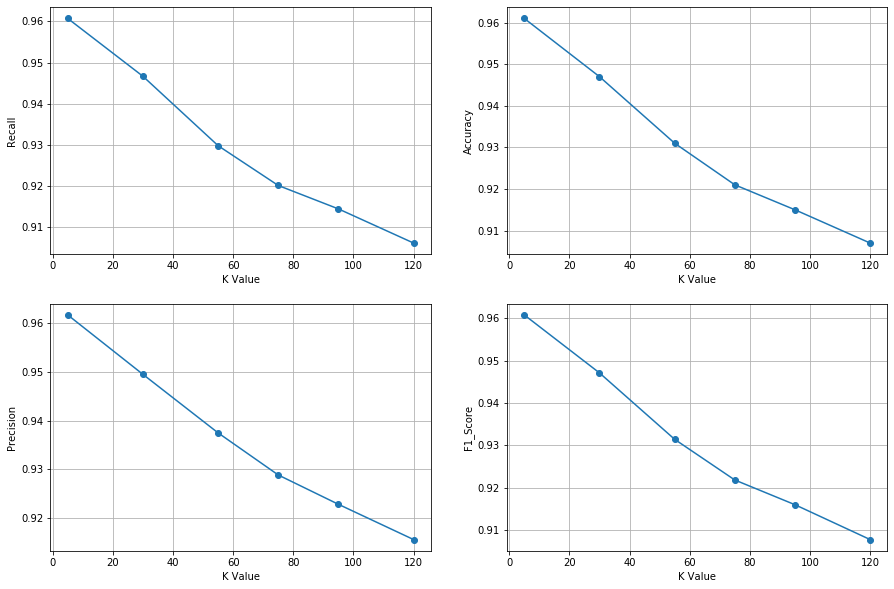

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, final_recall_axis,marker='o',label="Recall")
plt.grid(True)
# plt.legend(loc="upper right")
plt.xlabel('K Value')
plt.ylabel('Recall')

plt.subplot(2,2,2)
# plt.figure(figsize=(8,5))
plt.plot(kk, final_accuracy_axis,marker='o')
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
# plt.show()
plt.subplot(2,2,3)
# plt.figure(figsize=(8,5))
plt.plot(kk, final_precision_axis,marker='o')
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Precision')
# plt.show()
plt.subplot(2,2,4)
# plt.figure(figsize=(5))
plt.plot(kk, final_f1_score_axis,marker='o')
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('F1_Score')
plt.show()
# recall_axis

# SKLEARN KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
sklearknn_accuracy=[]
sklearnknn_recall=[]
sklearnknn_precision=[]
sklearnknn_f1score=[]

def sklearnknn(k):
    test_label = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q1/test_labels.csv",header=None)
    test_dff = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q1/test.csv",header=None)
    
    ddf = training_df.copy()
    labels = training_df.iloc[:,0]
    ddf.drop(columns=0,inplace=True,axis=1)
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(ddf,labels)
    predict = neigh.predict(test_dff)
    
    sklearknn_accuracy.append(accuracy_score(test_label,predict))
    sklearnknn_recall.append(recall_score(test_label,predict,average="macro",pos_label=1))
    sklearnknn_precision.append(precision_score(test_label,predict,average="macro",pos_label=1))
    sklearnknn_f1score.append(f1_score(test_label,predict,average="macro",pos_label=1))

sklearnknn(5)
sklearnknn(30)
sklearnknn(55)
# sklearnknn(75)
# sklearnknn(95)
# sklearnknn(120)


In [53]:
sklearnknn(75)
sklearnknn(95)
sklearnknn(120)

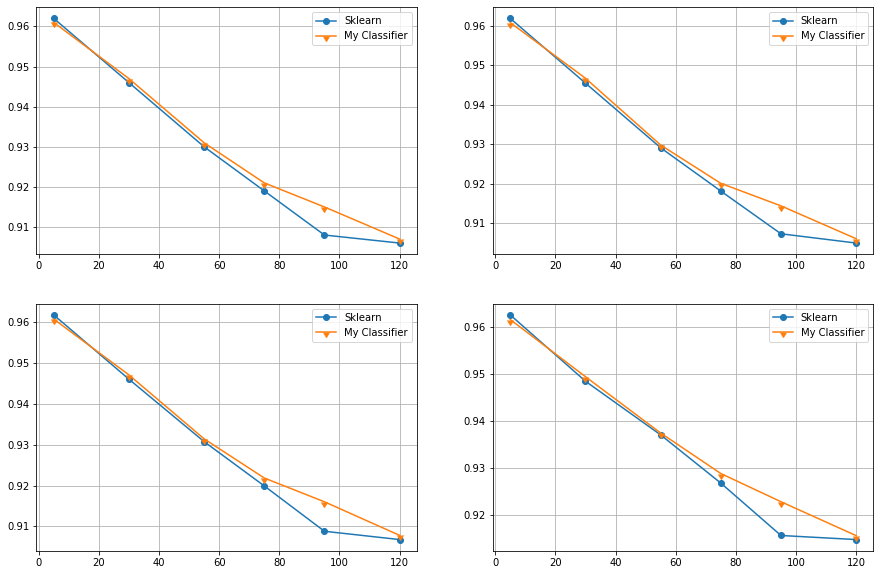

In [60]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(kk, sklearknn_accuracy,label="Sklearn",marker='o')
plt.plot(kk,final_accuracy_axis,label="My Classifier",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(kk, sklearnknn_recall,label="Sklearn",marker='o')
plt.plot(kk,final_recall_axis,label="My Classifier",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(kk, sklearnknn_f1score,label="Sklearn",marker='o')
plt.plot(kk,final_f1_score_axis,label="My Classifier",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.subplot(2,2,4)
plt.plot(kk, sklearnknn_precision,label="Sklearn",marker='o')
plt.plot(kk,final_precision_axis,label="My Classifier",marker=11)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()